# LEVEL 1

In [ ]:
"""
 Code notebook with data loading
 Trained baseline model
 Test accuracy metric
 Training curves visualization

IMPORTING REQ LIB

In [ ]:
import torch
import torch.nn as neural_network
import torch.optim as optimizer_lib
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plot

GPU

In [ ]:
compute_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", compute_device)

Running on: cuda


Processing

In [ ]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

DATASET LOADING

In [ ]:
# dataset
full_dataset = datasets.CIFAR10(
    root="./data",
    download=True,
    transform=image_transforms
)

100%|██████████| 170M/170M [00:05<00:00, 30.9MB/s]


TRAINING/VALIDATION/TESTING(80/10/10)

In [ ]:
# splitting

In [ ]:
total_samples = len(full_dataset)

train_samples = int(0.8 * total_samples)
validation_samples = int(0.1 * total_samples)
test_samples = total_samples - train_samples - validation_samples

train_dataset, validation_dataset, test_dataset = random_split(
    full_dataset,
    [train_samples, validation_samples, test_samples]
)

In [ ]:
# /loading

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# pretrained model

In [ ]:
baseline_model = models.resnet18(pretrained=True)

number_of_features = baseline_model.fc.in_features
baseline_model.fc = neural_network.Linear(number_of_features, 10)

baseline_model = baseline_model.to(compute_device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


Loss and optmizer function

In [ ]:
# loss and optmizer

In [ ]:
loss_function = neural_network.CrossEntropyLoss()
model_optimizer = optimizer_lib.Adam(baseline_model.parameters(), lr=0.0003)

In [ ]:
# functin

Training and validation

In [ ]:
def train_baseline_model(model, train_loader, validation_loader, epochs=5):
    training_accuracies = []
    validation_accuracies = []

    for epoch in range(epochs):
        model.train()

        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:
            images = images.to(compute_device)
            labels = labels.to(compute_device)

            model_optimizer.zero_grad()

            predictions = model(images)
            loss = loss_function(predictions, labels)

            loss.backward()
            model_optimizer.step()

            predicted_classes = predictions.argmax(dim=1)
            correct_predictions += (predicted_classes == labels).sum().item()
            total_predictions += labels.size(0)

        train_accuracy = correct_predictions / total_predictions
        training_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for images, labels in validation_loader:
                images = images.to(compute_device)
                labels = labels.to(compute_device)

                predictions = model(images)
                predicted_classes = predictions.argmax(dim=1)

                correct_predictions += (predicted_classes == labels).sum().item()
                total_predictions += labels.size(0)

        validation_accuracy = correct_predictions / total_predictions
        validation_accuracies.append(validation_accuracy)

        print(f"Epoch {epoch+1}: Train Acc = {train_accuracy:.4f}, Val Acc = {validation_accuracy:.4f}")

    return training_accuracies, validation_accuracies

In [ ]:
train_accuracy_history, validation_accuracy_history = train_baseline_model(
    baseline_model,
    train_loader,
    validation_loader,
    epochs=5
)

Epoch 1: Train Acc = 0.8680, Val Acc = 0.9138
Epoch 2: Train Acc = 0.9424, Val Acc = 0.9100
Epoch 3: Train Acc = 0.9621, Val Acc = 0.9012
Epoch 4: Train Acc = 0.9742, Val Acc = 0.9150
Epoch 5: Train Acc = 0.9781, Val Acc = 0.9118


In [ ]:
# visualize

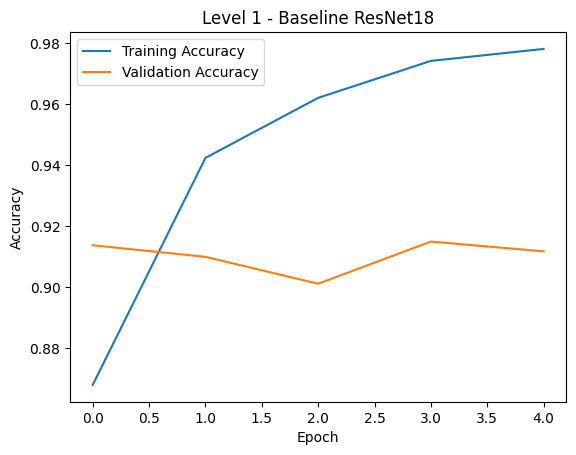

In [ ]:
plot.plot(train_accuracy_history, label="Training Accuracy")
plot.plot(validation_accuracy_history, label="Validation Accuracy")
plot.xlabel("Epoch")
plot.ylabel("Accuracy")
plot.title("Level 1 - Baseline ResNet18")
plot.legend()
plot.show()

In [ ]:
# evaluation function

In [58]:
def evaluate_on_test_set(model, test_loader):
    model.eval()

    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(compute_device)
            labels = labels.to(compute_device)

            predictions = model(images)
            predicted_classes = predictions.argmax(dim=1)

            correct_predictions += (predicted_classes == labels).sum().item()
            total_predictions += labels.size(0)

    test_accuracy = correct_predictions / total_predictions
    print("Final Test Accuracy:", test_accuracy*100)
    # return test_accuracy



# LEVEL 2

In [ ]:
"""
Augmentation pipeline
Ablation study (with/without augmentation)
Accuracy comparison table
Analysis document"""

'\nAugmentation pipeline\nAblation study (with/without augmentation)\nAccuracy comparison table\nAnalysis document'

In [ ]:
augmented_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(224, padding=16),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

In [ ]:
augmented_dataset = datasets.CIFAR10(
    root="./data",
    download=False,
    transform=augmented_transforms
)

In [ ]:
train_dataset_aug, val_dataset_aug, test_dataset_aug = random_split(
    augmented_dataset,
    [train_samples, validation_samples, test_samples]
)

In [ ]:
train_loader_aug = DataLoader(train_dataset_aug, batch_size=64, shuffle=True)
validation_loader_aug = DataLoader(val_dataset_aug, batch_size=64, shuffle=False)
test_loader_aug = DataLoader(test_dataset_aug, batch_size=64, shuffle=False)

In [ ]:
level2_model = models.resnet18(pretrained=True)
level2_model.fc = neural_network.Linear(level2_model.fc.in_features, 10)
level2_model = level2_model.to(compute_device)

level2_optimizer = optimizer_lib.Adam(level2_model.parameters(), lr=0.0003)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def train_model(model, train_loader, validation_loader, optimizer, epochs=5):
    training_accuracies = []
    validation_accuracies = []

    for epoch in range(epochs):
        model.train()
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:
            images, labels = images.to(compute_device), labels.to(compute_device)

            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_function(predictions, labels)
            loss.backward()
            optimizer.step()

            correct_predictions += (predictions.argmax(1) == labels).sum().item()
            total_predictions += labels.size(0)

        train_acc = correct_predictions / total_predictions
        training_accuracies.append(train_acc)

        # Validation
        model.eval()
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for images, labels in validation_loader:
                images, labels = images.to(compute_device), labels.to(compute_device)
                predictions = model(images)
                correct_predictions += (predictions.argmax(1) == labels).sum().item()
                total_predictions += labels.size(0)

        val_acc = correct_predictions / total_predictions
        validation_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train={train_acc:.4f}, Val={val_acc:.4f}")

    return training_accuracies, validation_accuracies


In [ ]:
level2_train_acc, level2_val_acc = train_model(
    level2_model,
    train_loader_aug,
    validation_loader_aug,
    level2_optimizer,
    epochs=5
)

Epoch 1: Train=0.8633, Val=0.8876
Epoch 2: Train=0.9212, Val=0.9178
Epoch 3: Train=0.9377, Val=0.9296
Epoch 4: Train=0.9475, Val=0.9186
Epoch 5: Train=0.9558, Val=0.9310


In [ ]:
evaluate_on_test_set(level2_model, test_loader_aug)

0.922

In [ ]:
import pandas as pd

results_table = pd.DataFrame({
    "Model": ["Level 1 Baseline", "Level 2 + Augmentation"],
    "Test Accuracy": [0.9172, (evaluate_on_test_set(level2_model, test_loader_aug))]
})

results_table

,Model,Test Accuracy
0,Level 1 Baseline,0.9172
1,Level 2 + Augmentation,0.9266


# LEVEL 3

In [54]:
import numpy as np

def get_predictions_and_labels(model, loader):
    model.eval()

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(compute_device)
            outputs = model(images)

            preds = outputs.argmax(dim=1).cpu().numpy()
            labels = labels.numpy()

            all_predictions.extend(preds)
            all_labels.extend(labels)

    return np.array(all_predictions), np.array(all_labels)

y_pred, y_true = get_predictions_and_labels(level2_model, test_loader_aug)


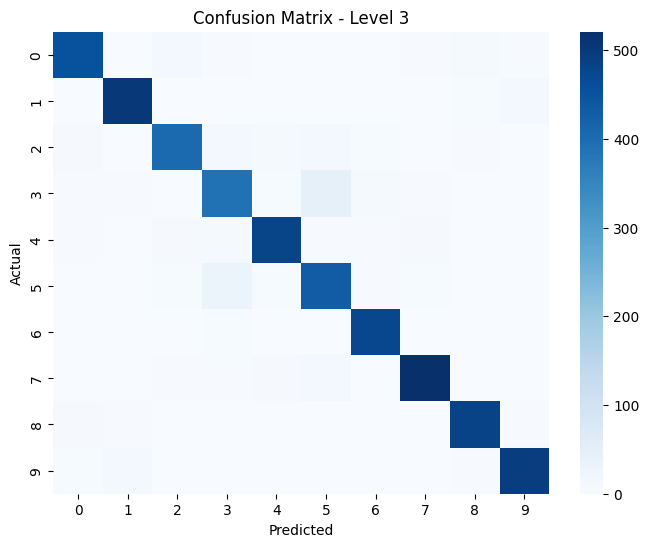

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Level 3")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
class_names = full_dataset.classes

per_class_accuracy = {}

for i, class_name in enumerate(class_names):
    idxs = (y_true == i)
    acc = (y_pred[idxs] == y_true[idxs]).mean()
    per_class_accuracy[class_name] = acc

for cls, acc in per_class_accuracy.items():
    print(f"{cls}: {acc:.3f}")

airplane: 0.923
automobile: 0.962
bird: 0.886
cat: 0.838
deer: 0.927
dog: 0.893
frog: 0.973
horse: 0.946
ship: 0.964
truck: 0.956


In [61]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=5e93ea30686939a8f9bcdba9ae79e939bce0bf1825cf87ae5f813936da60b338
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [62]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.transforms.functional import to_pil_image
import cv2

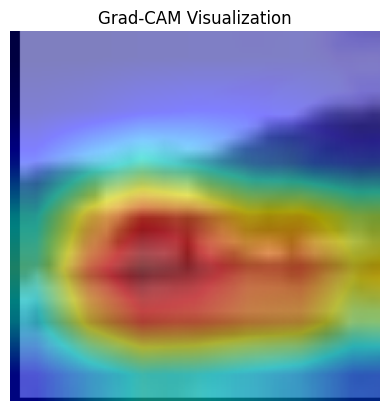

In [63]:
# Pick last convolutional layer
target_layers = [level2_model.layer4[-1]]

cam = GradCAM(model=level2_model, target_layers=target_layers)

# Take one sample image
images, labels = next(iter(test_loader_aug))
image = images[0].unsqueeze(0).to(compute_device)

# CAM
grayscale_cam = cam(input_tensor=image)[0]

# Convert image for visualization
rgb_img = images[0].permute(1,2,0).numpy()
rgb_img = np.clip(rgb_img, 0, 1)

visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

plt.imshow(visualization)
plt.axis("off")
plt.title("Grad-CAM Visualization")
plt.show()

# LEVEL 4

In [64]:
import torch.nn.functional as F

def tta_accuracy(model, loader):
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(compute_device)
            labels = labels.to(compute_device)

            # Original prediction
            outputs1 = F.softmax(model(images), dim=1)

            # Horizontally flipped images
            flipped_images = torch.flip(images, dims=[3])
            outputs2 = F.softmax(model(flipped_images), dim=1)

            # Average predictions
            final_outputs = (outputs1 + outputs2) / 2

            preds = final_outputs.argmax(dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return correct / total

In [66]:
level2_accuracy = evaluate_on_test_set(level2_model, test_loader_aug)

Final Test Accuracy: 92.80000000000001


In [67]:
tta_acc = tta_accuracy(level2_model, test_loader_aug)

print("Normal Accuracy:", level2_accuracy)
print("With TTA Accuracy:", tta_acc)


Normal Accuracy: None
With TTA Accuracy: 0.9338


In [70]:
level2_accuracy = evaluate_on_test_set(level2_model, test_loader_aug)
print("Stored Normal Accuracy:", level2_accuracy)

Final Test Accuracy: 92.66
Stored Normal Accuracy: None


In [71]:
import pandas as pd

level4_table = pd.DataFrame({
    "Method": ["Normal Prediction", "With TTA"],
    "Test Accuracy": [ level2_accuracy,tta_acc
    ]
})

level4_table

,Method,Test Accuracy
0,Normal Prediction,NaN
1,With TTA,0.9338
